
Nodal Displacements & Rotations:
Node 0: u=0.000000, v=0.000000, w=0.000000, θx=0.000000, θy=0.000000, θz=0.000000
Node 1: u=0.002840, v=1.598433, w=-0.001306, θx=-0.147204, θy=-0.016729, θz=0.182343
Node 2: u=0.000000, v=0.000000, w=0.000000, θx=-0.166163, θy=0.008791, θz=0.182343

Reaction Forces & Moments at Supports:
Node 0: Fx=-0.094683, Fy=-0.034201, Fz=0.004695, Mx=0.107988, My=-0.023598, Mz=-0.763019
Node 2: Fx=-0.005317, Fy=-0.015799, Fz=0.065305, Mx=0.000000, My=0.000000, Mz=0.000000


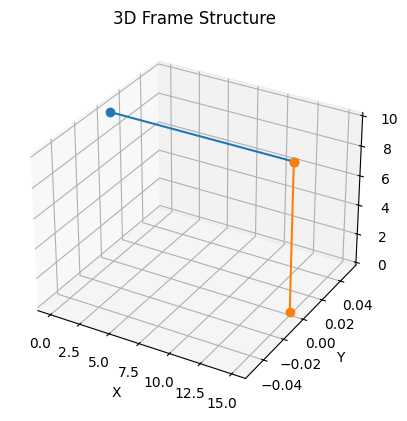

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Direct_Stiffness import Nodes, Elements, Frame

 # Define Nodes
nodes = []
nodes.append(Nodes(0.0, 0.0, 10.0))
nodes.append(Nodes(15.0, 0.0, 10.0))
nodes.append(Nodes(15.0, 0.0, 0.0))

# Apply boundary conditions
nodes[0].set_boundary_constraints([True, True, True, True, True, True])  # Node 1 constrained in all directions
nodes[1].set_boundary_constraints([False, False, False, False, False, False])   # Node 2 unconstrained
nodes[2].set_boundary_constraints([True, True, True, False, False, False])   # Node 3 constrained in X, Y, Z

nodes[1].set_nodal_load(0.1, 0.05, -0.07, 0.05, -0.1, 0.25)

E = 1000  # Young's Modulus in Pascals
b = 0.5  # Width of the beam in meters
h = 1.0  # Height of the beam in meters
v = 0.3  # Poisson's Ratio

# Cross-sectional properties
A = b * h  # Cross-sectional Area in square meters
I_y = (b * h**3) / 12  # Moment of Inertia about y-axis in meters^4
I_z = (h * b**3) / 12  # Moment of Inertia about z-axis in meters^4
I_p = (b * h / 12) * (b**2 + h**2)  # Polar Moment of Inertia in meters^4
J = 0.02861  # Torsional Constant in meters^4 (given)

# Local z-axis directions
local_z_axis_1 = [0, 0, 1]
local_z_axis_2 = [1, 0, 0]

# Assuming Elements class exists and nodes list is defined
elements = []
elements.append(Elements(nodes[0], nodes[1], E, v, A, I_y, I_z, I_p, J, local_z_axis_1))
elements.append(Elements(nodes[1], nodes[2], E, v, A, I_y, I_z, I_p, J, local_z_axis_2))


# Create Frame and Compute Results
frame = Frame(nodes, elements)
U, R = frame.calculations()

# Output Results
print("\nNodal Displacements & Rotations:")
for i, node in enumerate(nodes):
    print(f"Node {i}: u={U[i * 6]:.6f}, v={U[i * 6 + 1]:.6f}, w={U[i * 6 + 2]:.6f}, "
            f"θx={U[i * 6 + 3]:.6f}, θy={U[i * 6 + 4]:.6f}, θz={U[i * 6 + 5]:.6f}")

print("\nReaction Forces & Moments at Supports:")
for i, node in enumerate(nodes):
    if any(node.boundary_conditions):  # Only print for constrained nodes
        print(f"Node {i}: Fx={R[i * 6]:.6f}, Fy={R[i * 6 + 1]:.6f}, Fz={R[i * 6 + 2]:.6f}, "
                f"Mx={R[i * 6 + 3]:.6f}, My={R[i * 6 + 4]:.6f}, Mz={R[i * 6 + 5]:.6f}")
        
frame.plot()


Nodal Displacements & Rotations:
Node 0: u=0.162974, v=0.067537, w=0.000000, θx=0.003860, θy=-0.009777, θz=0.009977
Node 1: u=0.056838, v=-0.021273, w=-0.044235, θx=0.003956, θy=-0.009300, θz=0.009977
Node 2: u=0.001044, v=0.001091, w=0.000346, θx=0.003136, θy=-0.004005, θz=0.005143
Node 3: u=0.000000, v=0.000000, w=0.000000, θx=0.000000, θy=0.000000, θz=0.000000
Node 4: u=0.000000, v=0.000000, w=0.000000, θx=-0.004552, θy=0.000490, θz=0.000664

Reaction Forces & Moments at Supports:
Node 0: Fx=0.000000, Fy=0.000000, Fz=0.006672, Mx=0.000000, My=0.000000, Mz=0.000000
Node 3: Fx=-0.023513, Fy=0.137948, Fz=0.025325, Mx=-0.411611, My=0.298118, Mz=-0.361440
Node 4: Fx=-0.076487, Fy=-0.087948, Fz=0.043003, Mx=0.000000, My=0.000000, Mz=0.000000


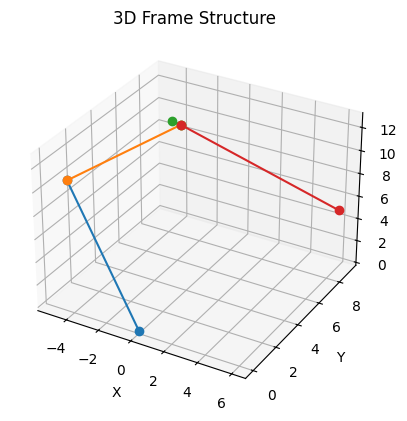

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from Direct_Stiffness import Nodes, Elements, Frame

 # Define Nodes
nodes = []
nodes.append(Nodes(0.0, 0.0, 0.0))
nodes.append(Nodes(-5.0, 1.0, 10.0))
nodes.append(Nodes(-1.0, 5.0, 13.0))
nodes.append(Nodes(-3.0, 7.0, 11.0))
nodes.append(Nodes(6.0, 9.0, 5.0))

# Apply boundary conditions
nodes[0].set_boundary_constraints([False, False, True, False, False, False])  # Node 1 consrained in Z
nodes[1].set_boundary_constraints([False, False, False, False, False, False])  # Node 2 constrained in Y, Z
nodes[2].set_boundary_constraints([False, False, False, False, False, False])  # Node 2 constrained in Y, Z
nodes[3].set_boundary_constraints([True, True, True, True, True, True])  # Node 2 constrained in Y, Z
nodes[4].set_boundary_constraints([True, True, True, False, False, False])  # Node 2 constrained in Y, Z

nodes[1].set_nodal_load(0.1, -0.05, -0.075, 0, 0, 0)
nodes[2].set_nodal_load(0, -0, 0, 0.5, -0.1, 0.3)

# Define Elements
E = 500  # Young's Modulus in Pascals
v = 0.3  # Poisson's Ratio
A = (np.pi)  # Cross-sectional Area in square meters
I_z = (np.pi/4)  # Moment of Inertia about z-axis in meters^4
I_y = (np.pi/4)  # Moment of Inertia about y-axis in meters^4
I_p = (np.pi/2)  # Polar Moment of Inertia in meters^4
J = (np.pi/2)  # Torsional Constant in meters^4
local_z_axis = [0, 0, 1]  # Local z-axis direction

elements = []
elements.append(Elements(nodes[0], nodes[1], E, v, A, I_z, I_y, I_p, J, local_z_axis))
elements.append(Elements(nodes[1], nodes[2], E, v, A, I_z, I_y, I_p, J, local_z_axis))
elements.append(Elements(nodes[3], nodes[2], E, v, A, I_z, I_y, I_p, J, local_z_axis))
elements.append(Elements(nodes[2], nodes[4], E, v, A, I_z, I_y, I_p, J, local_z_axis))


# Create Frame and Compute Results
frame = Frame(nodes, elements)
U, R = frame.calculations()

# Output Results
print("\nNodal Displacements & Rotations:")
for i, node in enumerate(nodes):
    print(f"Node {i}: u={U[i * 6]:.6f}, v={U[i * 6 + 1]:.6f}, w={U[i * 6 + 2]:.6f}, "
            f"θx={U[i * 6 + 3]:.6f}, θy={U[i * 6 + 4]:.6f}, θz={U[i * 6 + 5]:.6f}")

print("\nReaction Forces & Moments at Supports:")
for i, node in enumerate(nodes):
    if any(node.boundary_conditions):  # Only print for constrained nodes
        print(f"Node {i}: Fx={R[i * 6]:.6f}, Fy={R[i * 6 + 1]:.6f}, Fz={R[i * 6 + 2]:.6f}, "
                f"Mx={R[i * 6 + 3]:.6f}, My={R[i * 6 + 4]:.6f}, Mz={R[i * 6 + 5]:.6f}")
        
frame.plot()